<a href="https://colab.research.google.com/github/EryckNoronha/ProjetoGit/blob/main/Wallmart_deliverable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Walmart.csv to Walmart.csv


In [3]:
df = pd.read_csv('/content/Walmart.csv', sep=',')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
#Analisando valores nulos
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
#Analisando dupplicados
df.duplicated().sum()

0

As datas apresentam ano de 2010 á 2012 sendo interesante a comparação de anos

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


A conversão de Fahrenheit para C:elsius se dá pela formula (°F − 32) × 5/9 = 0 °C

In [8]:
#criando a conversão
def converterFandC(F):
  C = (F - 32) * (5 / 9)
  
  return C 

In [9]:
df['Temperature'] = converterFandC(df['Temperature'])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-05-02,1643690.90,0,5.727778,2.572,211.096358,8.106,5,2010
1,1,2010-12-02,1641957.44,1,3.616667,2.548,211.242170,8.106,12,2010
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106,2,2010
4,1,2010-05-03,1554806.68,0,8.055556,2.625,211.350143,8.106,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,18.266667,3.997,192.013558,8.684,9,2012
6431,45,2012-05-10,733455.07,0,18.272222,3.985,192.170412,8.667,5,2012
6432,45,2012-12-10,734464.36,0,12.483333,4.000,192.327265,8.667,12,2012
6433,45,2012-10-19,718125.53,0,13.594444,3.969,192.330854,8.667,10,2012


In [10]:
df['Temperature'] = df['Temperature'].astype(int)
df['Temperature'].describe()

count    6435.000000
mean       15.505051
std        10.102233
min       -18.000000
25%         8.000000
50%        17.000000
75%        23.000000
max        37.000000
Name: Temperature, dtype: float64

In [14]:
df.columns.values

array(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year'], dtype=object)

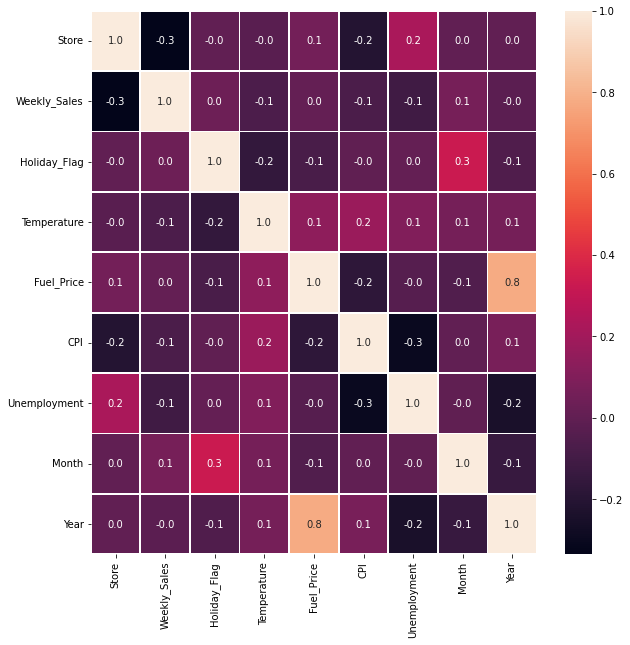

In [15]:
colums = df[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year']].corr().dropna()
plt.figure(figsize=[10,10])
plot = sns.heatmap(colums, annot = True, fmt=".1f", linewidths=1 )
plot